##2. Representación gráfica de datos y métricas

In [2]:
import pandas as pd

In [3]:
# cargar dataset generado
df_stores = pd.read_csv('df_stores.csv')
df_stores.head()

,id,store_id,store,address,zip_code,types,rating,total_ratings,location_lat,location_lng,conv_rate
0,ChIJBe7XKMvJBZERLxXLXN2i0bQ,1,T. ANGAMOS,"Angamos Open Plaza, Av. Angamos Este 1803, Sur...",15038,"department_store,food,point_of_interest,store,...",4.2,3499,-12.112123,-77.011967,0.325641
1,ChIJCYWX9UJKQpERd-1IXrKzHkA,2,T. AREQUIPA CAYMA,"Mallplaza, Av. Ejército 793, Cayma 04014, Perú",4014,"department_store,food,point_of_interest,store,...",4.0,11065,-16.390443,-71.546741,0.301041
2,ChIJeZLHYBpLQpERRLRv3_-pNnE,3,T. AREQUIPA PORONGOCHE,"Mall Aventura Plaza, Arequipa, Av. Porongoche ...",4008,"department_store,point_of_interest,store,estab...",3.9,3771,-16.416682,-71.514465,0.233449
3,ChIJe7R12Gu4BZERgoGU7LEot3Y,4,T. ATOCONGO,"Centro Comercial, Estacionamiento Open Pl. Ato...",15803,"department_store,food,point_of_interest,store,...",4.0,1457,-12.146962,-76.981434,0.376608
4,ChIJA_TqGVjJBZERWUarkHURiHk,5,T. BELLAVISTA,"Mall Aventura Plaza, Av. Óscar R. Benavides 38...",7011,"department_store,shopping_mall,store,food,poin...",4.1,4285,-12.055882,-77.101058,0.317479


In [41]:
# Definir la similitud entre nodos
from sklearn.metrics.pairwise import cosine_similarity

def calcular_similitud(store1, store2):
  # Weights
  weight_rating = 0.20
  weight_tot_rating = 0.10
  weight_conv_rate = 0.25
  weight_region = 0.35
  weight_types = 0.10

  # Atributos numericos
  rating1 = store1['rating']
  rating2 = store2['rating']
  tot_rating1 = store1['total_ratings']
  tot_rating2 = store2['total_ratings']
  conv_rate1 = store1['conv_rate']
  conv_rate2 = store2['conv_rate']

  # Atributos categoricos
  region1 = set([str(store1['zip_code'])[:2]])
  region2 = set([str(store2['zip_code'])[:2]])
  types1 = set(store1['types']. split(','))
  types2 = set(store2['types']. split(','))

  # Calcular similitud atributos numericos
  sim_rating = cosine_similarity([[rating1]], [[rating2]])[0][0]
  sim_tot_rating = cosine_similarity([[tot_rating1]], [[tot_rating2]])[0][0]
  sim_conv_rate = cosine_similarity([[conv_rate1]], [[conv_rate2]])[0][0]

  # Calcular similitud atributos categoricos
  dist_jaccard_region = 1 - (len(region1.intersection(region2)) / len(region1.union(region2)))
  sim_region = 1 - dist_jaccard_region

  dist_jaccard_types = 1 - (len(types1.intersection(types2)) / len(types1.union(types2)))
  sim_types = 1 - dist_jaccard_types

  similarity = (weight_rating * sim_rating + weight_tot_rating * sim_tot_rating + weight_conv_rate * sim_conv_rate + weight_region * sim_region + weight_types * sim_types)

  return similarity


In [43]:
 # Definir el grafo
import networkx as nx
import matplotlib.pyplot as plt
import math

G = nx.Graph()

for index, store in df_stores.iterrows():
  G.add_node(store['store_id'], name=store['store'])

for node1 in G.nodes():
  list_sim = []
  for node2 in G.nodes():
    if node1 != node2:
      store1 = df_stores[df_stores['store_id'] == node1].iloc[0]
      store2 = df_stores[df_stores['store_id'] == node2].iloc[0]
      similitud = round(calcular_similitud(store1, store2),2)
      list_sim.append(similitud)
      if similitud >= 0.8:
        G.add_edge(node1, node2, weight=similitud)


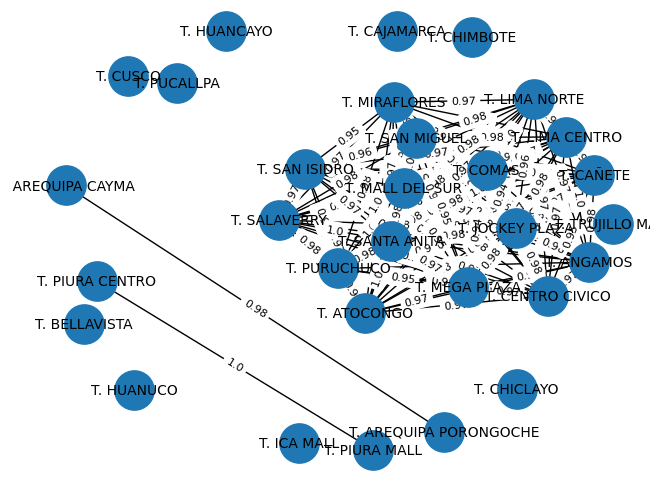

In [44]:
# Dibujar el grafo
pos = nx.spring_layout(G, k=2)
nx.draw(G, pos, with_labels=False, node_size=800, font_size=10, font_weight="bold")
labels = {node: data['name'] for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=10, font_color='black')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.show()

In [45]:
avg_degree_centrality = sum(nx.degree_centrality(G).values()) / len(G)
print('Degree centrality (Global):', avg_degree_centrality)

print('Degree centrality (Node):')
for k, v in sorted(nx.closeness_centrality(G).items(), key=lambda x: -x[1]):
  print(G.nodes[k]['name']+': '+'{:.3}'.format(v))

Degree centrality (Global): 0.2804597701149426
Degree centrality (Node):
T. ANGAMOS: 0.517
T. ATOCONGO: 0.517
T. CAÑETE: 0.517
T. CENTRO CIVICO: 0.517
T. COMAS: 0.517
T. JOCKEY PLAZA: 0.517
T. LIMA CENTRO: 0.517
T. LIMA NORTE: 0.517
T. MALL DEL SUR: 0.517
T. MEGA PLAZA: 0.517
T. MIRAFLORES: 0.517
T. PURUCHUCO: 0.517
T. SALAVERRY: 0.517
T. SAN ISIDRO: 0.517
T. SAN MIGUEL: 0.517
T. SANTA ANITA: 0.517
T. AREQUIPA CAYMA: 0.0345
T. AREQUIPA PORONGOCHE: 0.0345
T. PIURA CENTRO: 0.0345
T. PIURA MALL: 0.0345
T. BELLAVISTA: 0.0
T. CAJAMARCA: 0.0
T. CHICLAYO: 0.0
T. CHIMBOTE: 0.0
T. CUSCO: 0.0
T. HUANCAYO: 0.0
T. HUANUCO: 0.0
T. ICA MALL: 0.0
T. PUCALLPA: 0.0
T. TRUJILLO MALL: 0.0


In [46]:
print('Betweenness centrality (Node):')
for k, v in sorted(nx.betweenness_centrality(G).items(), key=lambda x: -x[1]):
  print(G.nodes[k]['name']+': '+'{:.3}'.format(v))

Betweenness centrality (Node):
T. ANGAMOS: 0.0
T. AREQUIPA CAYMA: 0.0
T. AREQUIPA PORONGOCHE: 0.0
T. ATOCONGO: 0.0
T. BELLAVISTA: 0.0
T. CAJAMARCA: 0.0
T. CAÑETE: 0.0
T. CENTRO CIVICO: 0.0
T. CHICLAYO: 0.0
T. CHIMBOTE: 0.0
T. COMAS: 0.0
T. CUSCO: 0.0
T. HUANCAYO: 0.0
T. HUANUCO: 0.0
T. ICA MALL: 0.0
T. JOCKEY PLAZA: 0.0
T. LIMA CENTRO: 0.0
T. LIMA NORTE: 0.0
T. MALL DEL SUR: 0.0
T. MEGA PLAZA: 0.0
T. MIRAFLORES: 0.0
T. PIURA CENTRO: 0.0
T. PIURA MALL: 0.0
T. PUCALLPA: 0.0
T. PURUCHUCO: 0.0
T. SALAVERRY: 0.0
T. SAN ISIDRO: 0.0
T. SAN MIGUEL: 0.0
T. SANTA ANITA: 0.0
T. TRUJILLO MALL: 0.0


In [47]:
print('Closeness centrality (Node):')
for k, v in sorted(nx.closeness_centrality(G).items(), key=lambda x: -x[1]):
  print(G.nodes[k]['name']+': '+'{:.3}'.format(v))

Closeness centrality (Node):
T. ANGAMOS: 0.517
T. ATOCONGO: 0.517
T. CAÑETE: 0.517
T. CENTRO CIVICO: 0.517
T. COMAS: 0.517
T. JOCKEY PLAZA: 0.517
T. LIMA CENTRO: 0.517
T. LIMA NORTE: 0.517
T. MALL DEL SUR: 0.517
T. MEGA PLAZA: 0.517
T. MIRAFLORES: 0.517
T. PURUCHUCO: 0.517
T. SALAVERRY: 0.517
T. SAN ISIDRO: 0.517
T. SAN MIGUEL: 0.517
T. SANTA ANITA: 0.517
T. AREQUIPA CAYMA: 0.0345
T. AREQUIPA PORONGOCHE: 0.0345
T. PIURA CENTRO: 0.0345
T. PIURA MALL: 0.0345
T. BELLAVISTA: 0.0
T. CAJAMARCA: 0.0
T. CHICLAYO: 0.0
T. CHIMBOTE: 0.0
T. CUSCO: 0.0
T. HUANCAYO: 0.0
T. HUANUCO: 0.0
T. ICA MALL: 0.0
T. PUCALLPA: 0.0
T. TRUJILLO MALL: 0.0


## 3. Propuesta del Modelo

In [74]:
# cargar dataset generado
df_reviews = pd.read_csv('df_reviews.csv')
df_reviews.head()

,store_id,store,text
0,1,T. ANGAMOS,"Este local comercial, a pesar de tener 3 pisos..."
1,1,T. ANGAMOS,Falabella es una tienda por departamentos chil...
2,1,T. ANGAMOS,Buen lugar para hacer las compras para el hoga...
3,1,T. ANGAMOS,"Estuve hace 2 semanas, y era un caos. En el 1e..."
4,1,T. ANGAMOS,Muy buenas oferta sobre todo horita en tempora...


### 3.1. Preprocesamiento de texto

In [65]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [75]:
def preprocesing(text):
  # Tokenizacion
  tokens = word_tokenize(text)
  # Eliminar tokens no alfabeticos
  words = [word.lower() for word in tokens if word.isalpha()]
  # Stopwords
  stop_words = set(stopwords.words('spanish'))
  words = [w for w in words if not w in stop_words]
  # Lematizar
  wnl = nltk.stem.WordNetLemmatizer()
  lemmas = [wnl.lemmatize(word) for word in words]
  result = ' '.join(lemmas)
  return result

In [76]:
for index, review in df_reviews.iterrows():
  clean = preprocesing(review['text'])
  break

In [77]:
# Limpieza del texto
df_reviews['lemma'] = df_reviews['text'].apply(preprocesing)
df_reviews.head()

,store_id,store,text,lemma
0,1,T. ANGAMOS,"Este local comercial, a pesar de tener 3 pisos...",local comercial pesar tener pisos visitar pequ...
1,1,T. ANGAMOS,Falabella es una tienda por departamentos chil...,falabella tienda departamentos chilena fama ni...
2,1,T. ANGAMOS,Buen lugar para hacer las compras para el hoga...,buen lugar hacer compras hogar oficina terraza...
3,1,T. ANGAMOS,"Estuve hace 2 semanas, y era un caos. En el 1e...",hace semanas caos piso ropa dama solo probador...
4,1,T. ANGAMOS,Muy buenas oferta sobre todo horita en tempora...,buenas oferta horita temporada inviernos vi ca...


###3.2. Analisis de sentimiento

###3.2.1. Transformers

In [89]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.1 MB/s eta 0:00:00


In [96]:
import transformers
from transformers import pipeline

sentiment_pipeline = pipeline('sentiment-analysis',
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
transformers_analyzed = df_reviews.copy()

for index, row in transformers_analyzed.iterrows():
  result = sentiment_pipeline(row['text'])[0]
  transformers_analyzed.at[index, 'score'] = result['score']
  transformers_analyzed.at[index, 'label'] = result['label']

transformers_analyzed.head()

In [ ]:
transformers_analyzed["sentiment"] = transformers_analyzed["score"].apply(lambda x: "Negativo" if x < 0.5 else "Neutro" if x < 0.6 else "Positivo" if x < 1 else "Indefinido")

###3.2.2. Textblob

In [88]:
from textblob import TextBlob

def subjectivity(review):
  return TextBlob(review).sentiment.subjectivity

def polarity(review):
    return TextBlob(review).sentiment.polarity

def polarity_analysis(score):
    if score < 0:
        return 'Negativo'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positivo'


In [82]:
review_analyzed = df_reviews.copy()
review_analyzed['polarity'] = review_analyzed['lemma'].apply(polarity)
review_analyzed['analysis'] = review_analyzed['polarity'].apply(polarity_analysis)
review_analyzed.head()

,store_id,store,text,lemma,polarity,analysis
0,1,T. ANGAMOS,"Este local comercial, a pesar de tener 3 pisos...",local comercial pesar tener pisos visitar pequ...,0.0,Neutral
1,1,T. ANGAMOS,Falabella es una tienda por departamentos chil...,falabella tienda departamentos chilena fama ni...,0.0,Neutral
2,1,T. ANGAMOS,Buen lugar para hacer las compras para el hoga...,buen lugar hacer compras hogar oficina terraza...,0.0,Neutral
3,1,T. ANGAMOS,"Estuve hace 2 semanas, y era un caos. En el 1e...",hace semanas caos piso ropa dama solo probador...,0.0,Neutral
4,1,T. ANGAMOS,Muy buenas oferta sobre todo horita en tempora...,buenas oferta horita temporada inviernos vi ca...,0.0,Neutral


Tienda:  T. ANGAMOS 
-----------------------------
Neutral     3133
Positivo      97
Negativo      21
Name: analysis, dtype: int64


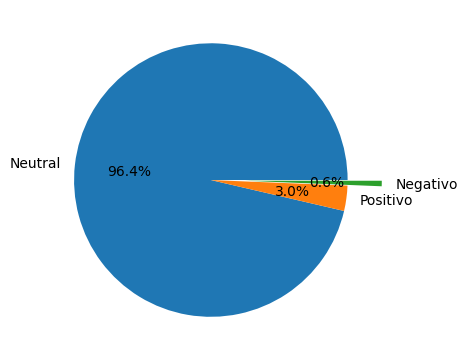

Tienda:  T. AREQUIPA CAYMA 
-----------------------------
Neutral     1305
Positivo      29
Negativo      15
Name: analysis, dtype: int64


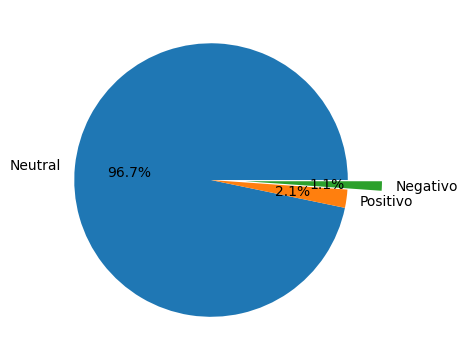

Tienda:  T. AREQUIPA PORONGOCHE 
-----------------------------
Neutral     1066
Positivo      16
Negativo      14
Name: analysis, dtype: int64


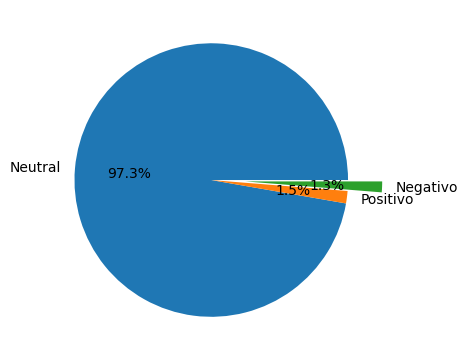

Tienda:  T. ATOCONGO 
-----------------------------
Neutral     519
Positivo     17
Negativo      5
Name: analysis, dtype: int64


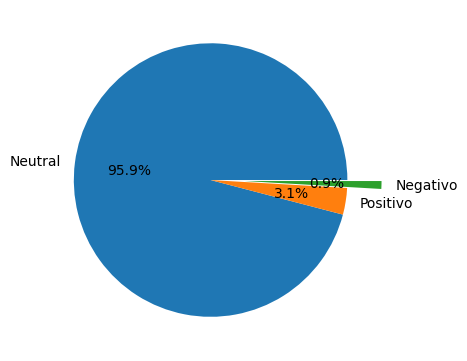

Tienda:  T. BELLAVISTA 
-----------------------------
Neutral     1464
Positivo      35
Negativo       3
Name: analysis, dtype: int64


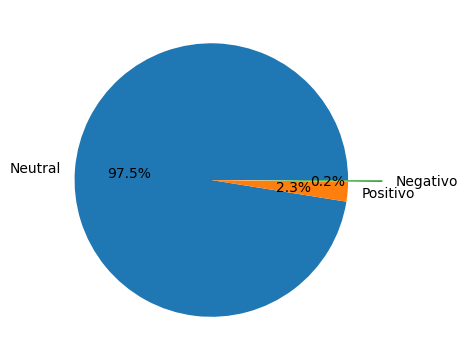

Tienda:  T. CAJAMARCA 
-----------------------------
Neutral     613
Positivo     15
Name: analysis, dtype: int64


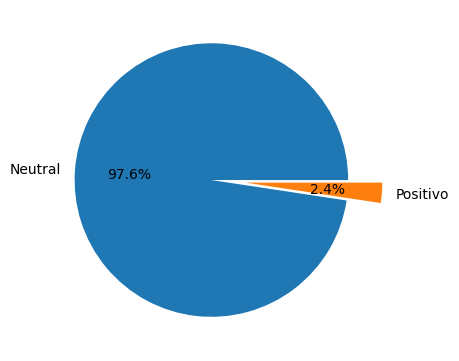

Tienda:  T. CAÑETE 
-----------------------------
Neutral     333
Positivo      5
Name: analysis, dtype: int64


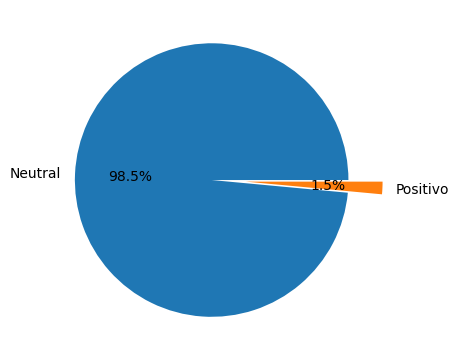

Tienda:  T. CENTRO CIVICO 
-----------------------------
Neutral     2101
Positivo      54
Negativo       6
Name: analysis, dtype: int64


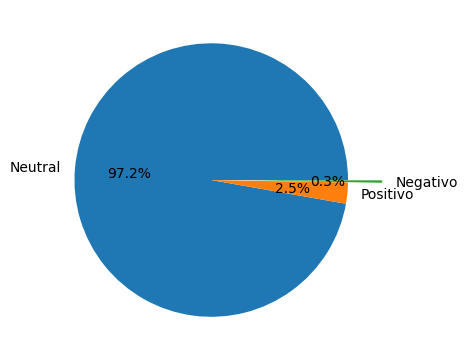

Tienda:  T. CHICLAYO 
-----------------------------
Neutral     1240
Positivo      28
Negativo       4
Name: analysis, dtype: int64


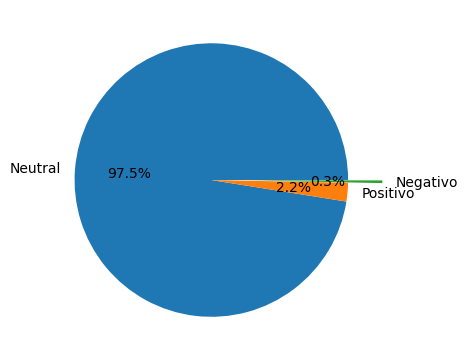

Tienda:  T. CHIMBOTE 
-----------------------------
Neutral     681
Positivo      8
Negativo      1
Name: analysis, dtype: int64


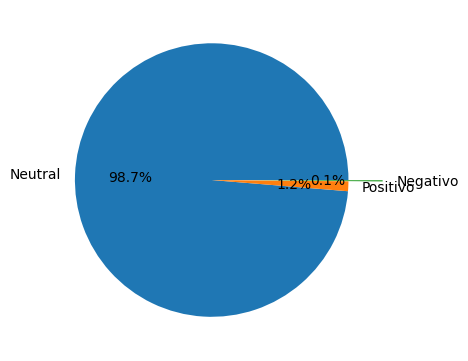

Tienda:  T. COMAS 
-----------------------------
Neutral     1237
Positivo      35
Negativo      25
Name: analysis, dtype: int64


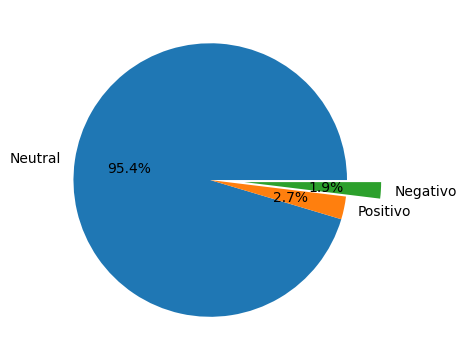

Tienda:  T. CUSCO 
-----------------------------
Neutral     730
Positivo     18
Negativo      6
Name: analysis, dtype: int64


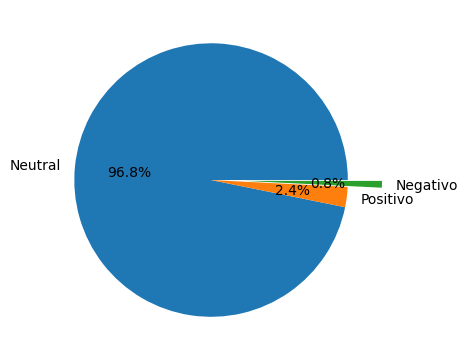

Tienda:  T. HUANCAYO 
-----------------------------
Neutral     455
Positivo      4
Name: analysis, dtype: int64


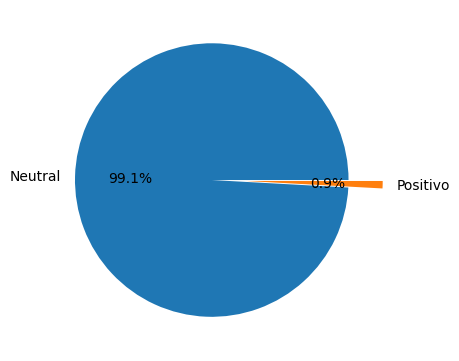

Tienda:  T. HUANUCO 
-----------------------------
Neutral     230
Positivo      4
Negativo      2
Name: analysis, dtype: int64


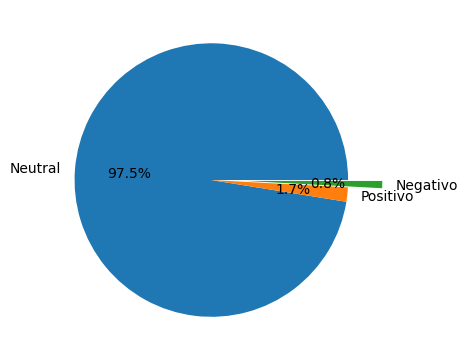

Tienda:  T. ICA MALL 
-----------------------------
Neutral     717
Positivo     14
Negativo      3
Name: analysis, dtype: int64


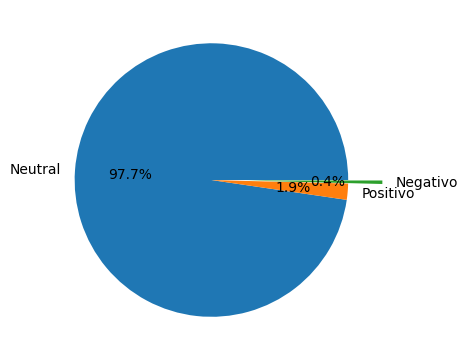

Tienda:  T. JOCKEY PLAZA 
-----------------------------
Neutral     4678
Positivo      84
Negativo      21
Name: analysis, dtype: int64


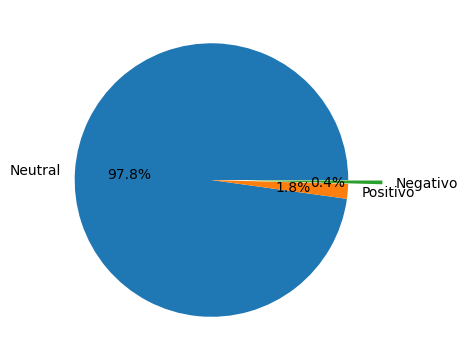

Tienda:  T. LIMA CENTRO 
-----------------------------
Neutral     1308
Positivo      33
Negativo       5
Name: analysis, dtype: int64


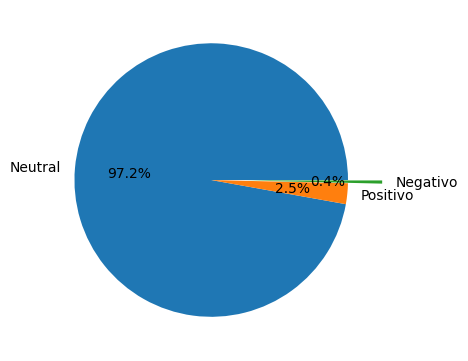

Tienda:  T. LIMA NORTE 
-----------------------------
Neutral     2199
Positivo      27
Negativo       9
Name: analysis, dtype: int64


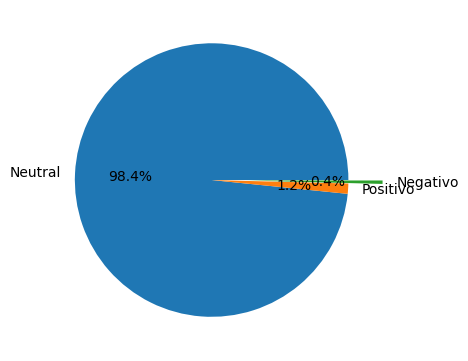

Tienda:  T. MALL DEL SUR 
-----------------------------
Neutral     2038
Positivo      40
Negativo       6
Name: analysis, dtype: int64


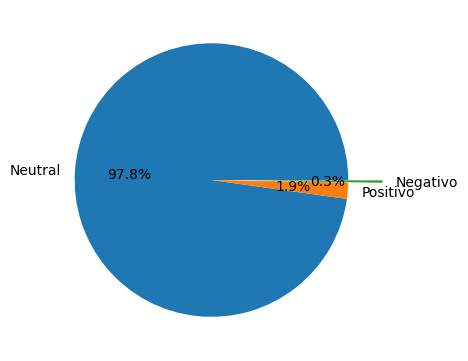

Tienda:  T. MEGA PLAZA 
-----------------------------
Neutral     2170
Positivo      52
Negativo       8
Name: analysis, dtype: int64


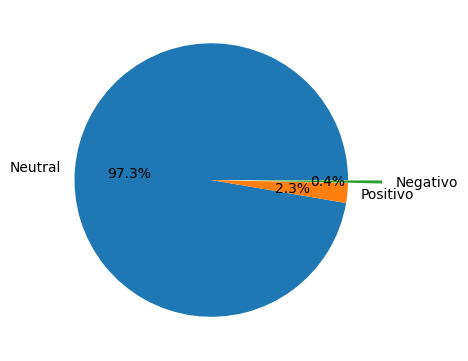

Tienda:  T. MIRAFLORES 
-----------------------------
Neutral     3278
Positivo      86
Negativo      15
Name: analysis, dtype: int64


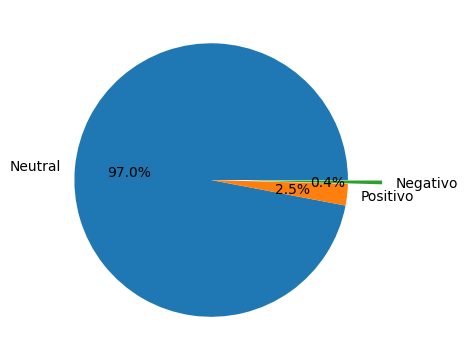

Tienda:  T. PIURA CENTRO 
-----------------------------
Neutral     501
Positivo      9
Name: analysis, dtype: int64


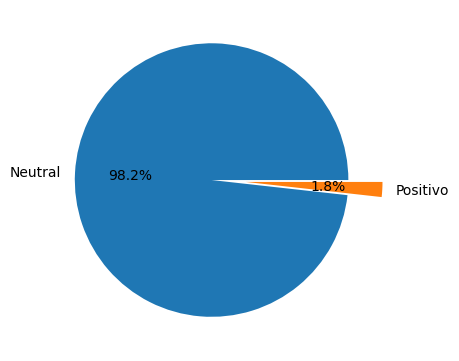

Tienda:  T. PIURA MALL 
-----------------------------
Neutral     933
Positivo      7
Negativo      1
Name: analysis, dtype: int64


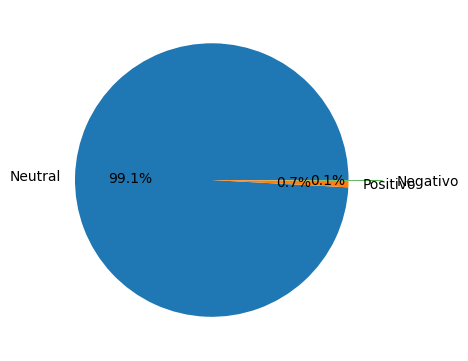

Tienda:  T. PUCALLPA 
-----------------------------
Neutral     282
Positivo      2
Name: analysis, dtype: int64


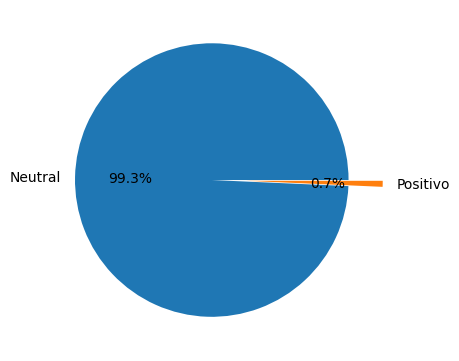

Tienda:  T. PURUCHUCO 
-----------------------------
Neutral     1391
Positivo      25
Negativo       4
Name: analysis, dtype: int64


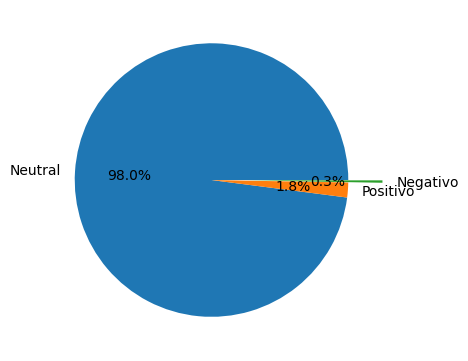

Tienda:  T. SALAVERRY 
-----------------------------
Neutral     3160
Positivo      64
Negativo       6
Name: analysis, dtype: int64


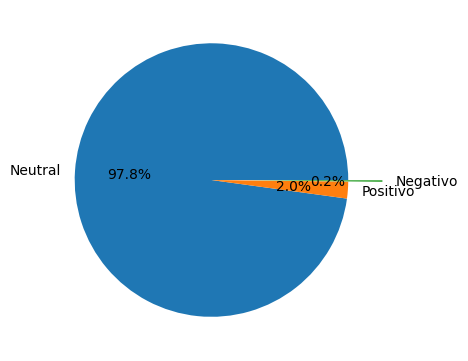

Tienda:  T. SAN ISIDRO 
-----------------------------
Neutral     3598
Positivo     102
Negativo      22
Name: analysis, dtype: int64


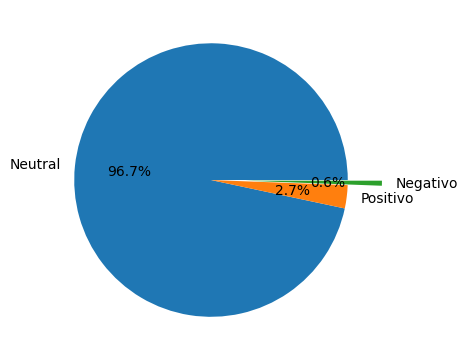

Tienda:  T. SAN MIGUEL 
-----------------------------
Neutral     5891
Positivo     108
Negativo      23
Name: analysis, dtype: int64


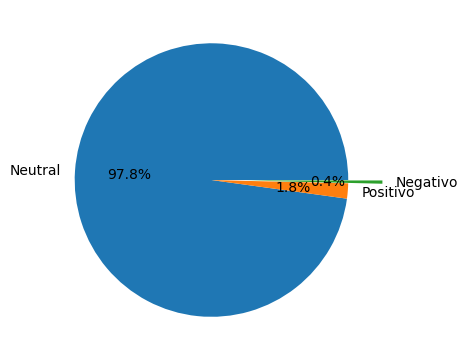

Tienda:  T. SANTA ANITA 
-----------------------------
Neutral     1455
Positivo      21
Negativo      14
Name: analysis, dtype: int64


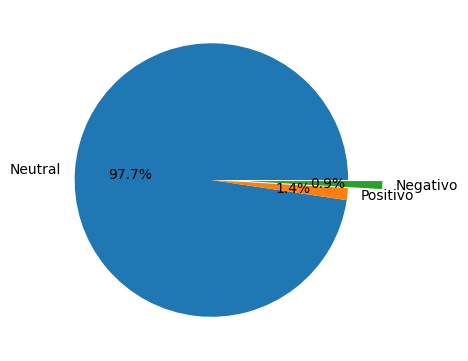

Tienda:  T. TRUJILLO MALL 
-----------------------------
Neutral     1325
Positivo      20
Negativo       4
Name: analysis, dtype: int64


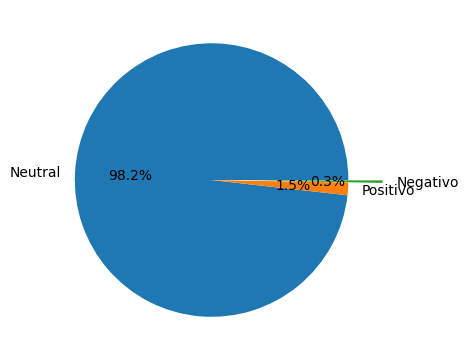

In [123]:
# Resumen por tienda
list_rows = review_analyzed.drop_duplicates(subset=['store_id', 'store'])

# Visualziación
import matplotlib.pyplot as plt
%matplotlib inline

for index, row in list_rows.iterrows():
  reviews_store = review_analyzed[review_analyzed['store_id'] == row['store_id']]
  summary = reviews_store.analysis.value_counts()
  print('Tienda: ', row['store'],'\n-----------------------------')
  print(summary)
  plt.figure(figsize=(15,7))
  plt.subplot(1,3,2)
  if len(summary.values) == 3:
    explode = (0, 0, 0.25)
  else:
    explode = (0, 0.25)

  plt.pie(summary.values, labels = summary.index, explode = explode, autopct='%1.1f%%', shadow=False)
  plt.show()
